In [2]:
from utils.binaries import *
from utils.plotting import *

09:07:01 (  +16.9s) [INFO   ] -- import logging
09:07:01 (  +185ms) [INFO   ] -- import numpy as np
09:07:01 (    +7ms) [INFO   ] -- import uncertainties
09:07:02 (  +497ms) [INFO   ] -- import pandas as pd
09:07:02 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
09:07:02 (    +3ms) [INFO   ] -- import binaries.tools as tools
09:07:02 (  +354ms) [INFO   ] -- import matplotlib.pyplot as plt
09:07:03 (  +600ms) [INFO   ] -- import seaborn as so
09:07:03 (    +2ms) [INFO   ] -- import plotting.tools as plot
09:07:03 (   +11ms) [DEBUG  ] -- font size set to 9.5
09:07:03 (    +1ms) [DEBUG  ] -- label size set to 13.0
09:07:03 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
09:07:03 (    +0ms) [DEBUG  ] -- markersize set to 2.0
09:07:03 (    +1ms) [DEBUG  ] -- usetex set to False


In [3]:
from Event import Event

class cfg_class():

    threshold : dict = {
        'wcd' : 0.2,
        'ssd' : 12,
    }

    occupancy : dict = {
        'wcd' : 12,
        'ssd' : 0,
    }

    multiplicity : dict = {
        'wcd' : 1,
        'ssd' : 0,
    }

In [4]:
test = Event("/cr/work/filip/SSDTriggerEfficiency/run01/DAT010002_000015.csv", cfg_class())
print(test)

(500.0, 1000.0)

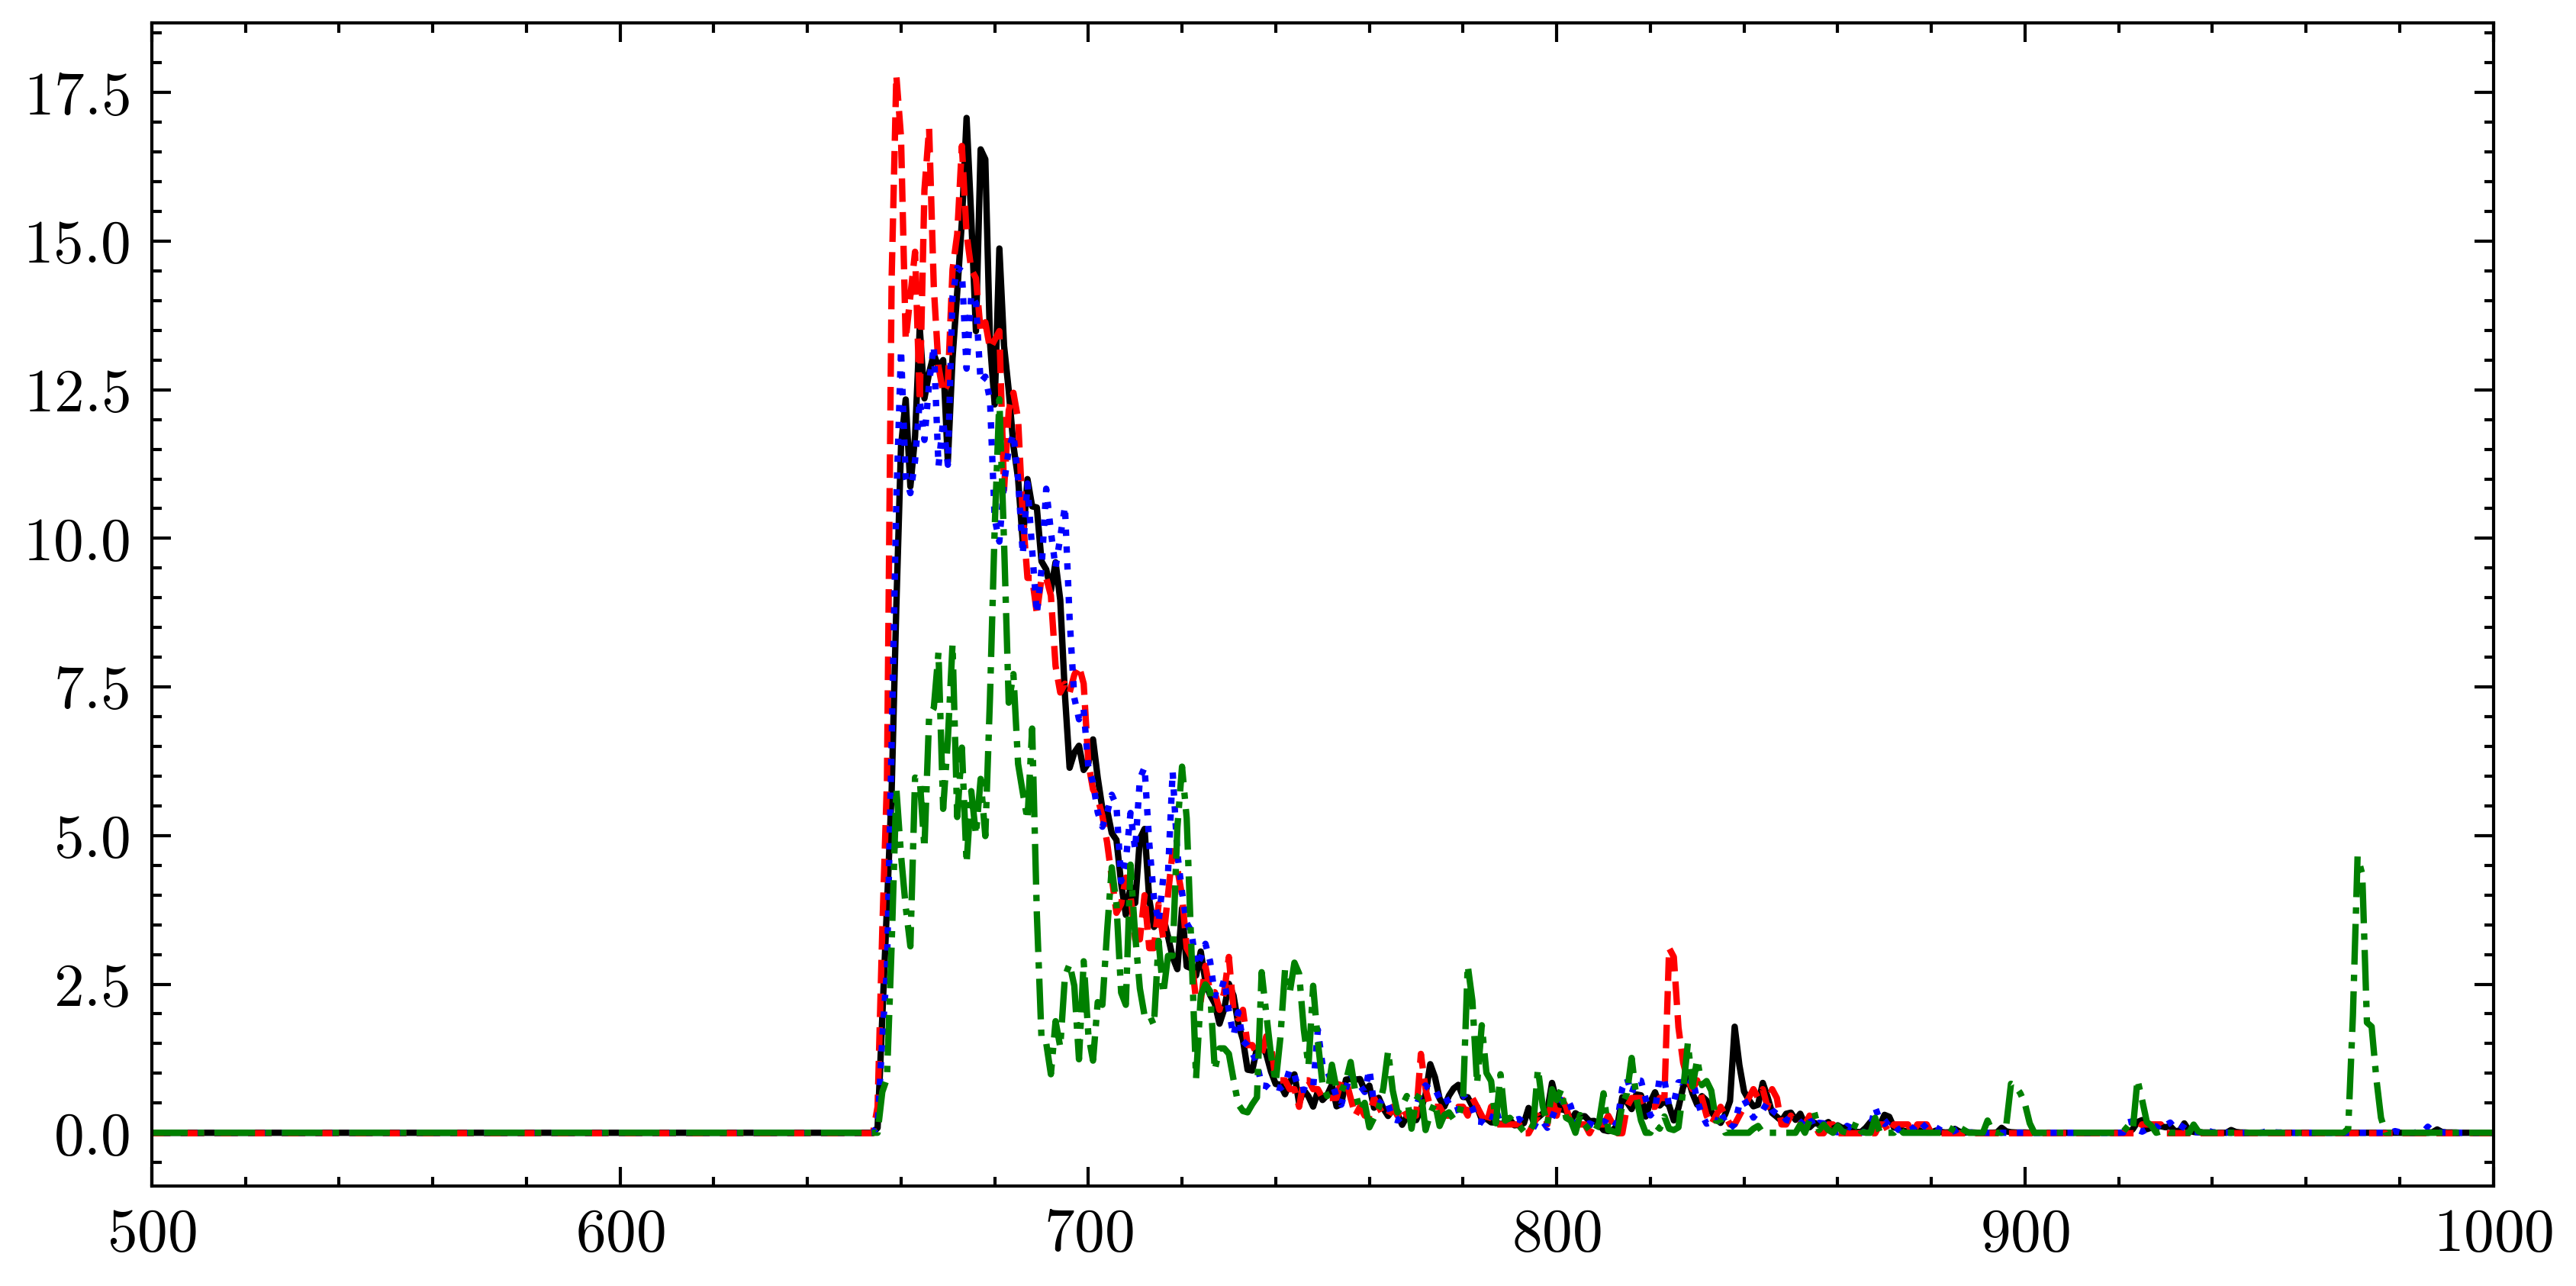

In [6]:
[plt.plot(range(2048), trace) for trace in test[5430].wcd_traces]
plt.plot(range(2048), test[5430].ssd)

# plt.ylim(0, 0.2)
plt.xlim(500, 1000)

In [44]:
df1 = pd.read_csv('/cr/work/filip/SSDTriggerEfficiency/run01_evaluated/DAT010002_000000.csv', index_col='params')
df2 = pd.read_csv('/cr/work/filip/SSDTriggerEfficiency/run01_evaluated/DAT010002_000015.csv', index_col='params')

In [45]:
df1


,sum_close,n_close,sum_far,n_far
params,,,,
"(5, 0.45136054421768707)",0,1,2,3
"(5, 0.46139455782312927)",0,1,2,3
"(5, 0.4714285714285714)",0,1,2,3
"(5, 0.48146258503401357)",0,1,2,3
"(5, 0.4914965986394558)",0,1,2,3
...,...,...,...,...
"(44, 2.959863945578231)",0,1,0,3
"(44, 2.9698979591836734)",0,1,0,3
"(44, 2.9799319727891156)",0,1,0,3


In [46]:
df2

,sum_close,n_close,sum_far,n_far
params,,,,
"(5, 0.45136054421768707)",0,1,4,4
"(5, 0.46139455782312927)",0,1,4,4
"(5, 0.4714285714285714)",0,1,4,4
"(5, 0.48146258503401357)",0,1,4,4
"(5, 0.4914965986394558)",0,1,4,4
...,...,...,...,...
"(44, 2.959863945578231)",-1,1,0,4
"(44, 2.9698979591836734)",-1,1,0,4
"(44, 2.9799319727891156)",-1,1,0,4


In [49]:
df1 += df2

In [50]:
df1

,sum_close,n_close,sum_far,n_far
params,,,,
"(5, 0.45136054421768707)",0,2,6,7
"(5, 0.46139455782312927)",0,2,6,7
"(5, 0.4714285714285714)",0,2,6,7
"(5, 0.48146258503401357)",0,2,6,7
"(5, 0.4914965986394558)",0,2,6,7
...,...,...,...,...
"(44, 2.959863945578231)",-1,2,0,7
"(44, 2.9698979591836734)",-1,2,0,7
"(44, 2.9799319727891156)",-1,2,0,7


In [41]:
def filter_close(col):
    spd = int(col)

    return spd < 750

cols_close = [col for col in df.columns if filter_close(col)]
df_close = df[cols_close]
df_close['sum_close'] = df_close.sum(axis=1, numeric_only=True)
df_close['n_close'] = len(cols_close)
cols_far = [col for col in df.columns if not filter_close(col)]
df_far = df[cols_far]
df_far['sum_far'] = df_far.sum(axis=1, numeric_only = True)
df_far['n_far'] = len(cols_far)

df_new = pd.concat([df_close[["sum_close", "n_close"]], df_far[["sum_far", "n_far"]]], axis=1)

/tmp/ipykernel_447327/3409170274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['sum_close'] = df_close.sum(axis=1, numeric_only=True)
/tmp/ipykernel_447327/3409170274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['n_close'] = len(cols_close)


In [42]:
print(df_new)

                          sum_close  n_close  sum_far  n_far
params                                                      
(5, 0.45136054421768707)          0        1        2      3
(5, 0.46139455782312927)          0        1        2      3
(5, 0.4714285714285714)           0        1        2      3
(5, 0.48146258503401357)          0        1        2      3
(5, 0.4914965986394558)           0        1        2      3
...                             ...      ...      ...    ...
(44, 2.959863945578231)           0        1        0      3
(44, 2.9698979591836734)          0        1        0      3
(44, 2.9799319727891156)          0        1        0      3
(44, 2.989965986394558)           0        1        0      3
(44, 3.0)                         0        1        0      3

[11214 rows x 4 columns]
